<a href="https://colab.research.google.com/github/superchromat/901/blob/main/MCK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for data analysis for 901.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/superchromat/901/main/MCK.csv")

In [13]:
df

,Acceleration,Velocity,Position,Force
0,0.160962,-0.482996,45.158492,42.924609
1,0.155914,-0.327082,44.831410,55.068349
2,0.150866,-0.176215,44.655195,66.607411
3,0.145818,-0.030397,44.624799,77.556175
4,0.140771,0.110374,44.735173,87.929025
...,...,...,...,...
99,-0.034629,0.085888,183.456690,10.286581
100,-0.033274,0.052614,183.509304,8.326980
101,-0.031919,0.020696,183.530000,6.420293
102,-0.030563,-0.009868,183.520132,4.565424


In [14]:
df.describe()

,Acceleration,Velocity,Position,Force
count,104.000000,104.000000,104.000000,104.000000
mean,0.005816,1.325380,122.085437,117.811368
std,0.062385,0.807526,50.455441,64.187470
min,-0.050069,-0.482996,44.624799,2.761275
25%,-0.044106,0.627002,72.631178,60.910946
50%,-0.025422,1.481611,130.152720,125.734657
75%,0.045148,2.081039,172.121310,179.353106
max,0.160962,2.307929,183.530000,199.769691


In [15]:
scaler = MinMaxScaler()
df_features = ['Acceleration','Velocity', 'Position', 'Force']
# column transformer
df_scaler = ColumnTransformer([
        ('num features', scaler, df_features),], remainder='passthrough')
df = df_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=df_features)  

In [16]:
df.describe()

,Acceleration,Velocity,Position,Force
count,104.000000,104.000000,104.000000,104.000000
mean,0.264820,0.647949,0.557651,0.583986
std,0.295622,0.289340,0.363237,0.325811
min,0.000000,0.000000,0.000000,0.000000
25%,0.028258,0.397717,0.201622,0.295163
50%,0.116791,0.703927,0.615729,0.624204
75%,0.451197,0.918704,0.917867,0.896367
max,1.000000,1.000000,1.000000,1.000000


In [17]:
# independent values
X = df[['Acceleration','Velocity', 'Position']]
# dependent values
y = df['Force']

Using Linear Regression

In [18]:

reg = LinearRegression(fit_intercept=False)
reg.fit(X,y)
#print('Intercept: \n', reg.intercept_)
print('Coefficients:\n M                 C              K \n', reg.coef_)

Coefficients:
 M                 C              K 
 [ 0.29679644  0.96262329 -0.21266667]


Using a support vector regression with a polynomial kernel.

In [29]:

svr = SVR(kernel = 'linear', degree=1, fit_intercept=False)
svr.fit(X, y)
print('Coefficients:\n M                 C              K \n', svr.coef_)
print('Intercept: \n', svr.intercept_)

TypeError: ignored

Using SGD Regression

In [34]:
sgd = SGDRegressor(loss='squared_error', fit_intercept=True, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
sgd.fit(X, y)
print('Coefficients:\n M                 C              K \n', sgd.coef_)
print('Intercept: \n', sgd.intercept_)

Coefficients:
 M                 C              K 
 [ 0.18625067  0.41857055 -0.06461698]
Intercept: 
 [0.30291821]


This output includes the intercept and coefficients. We can use this information to build the multiple linear regression equation as follows:

Force = (Intercept) + (M_coef)*Acceleration + (C_coef)*Velocity + (K_coef)*Position

Draw scatterplots of the Parameters in relation to the Force.

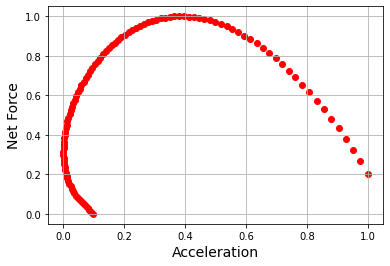

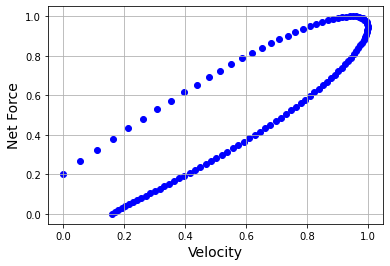

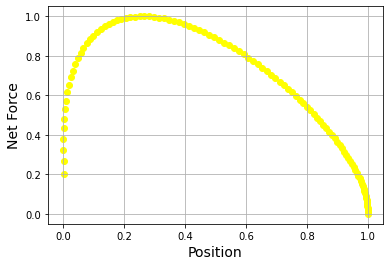

In [24]:
plt.scatter(df['Acceleration'], df['Force'], color='red')
plt.title('', fontsize=14)
plt.xlabel('Acceleration', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Velocity'], df['Force'], color='blue')
plt.title('', fontsize=14)
plt.xlabel('Velocity', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['Position'], df['Force'], color='yellow')
plt.title('', fontsize=14)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Net Force', fontsize=14)
plt.grid(True)
plt.show()

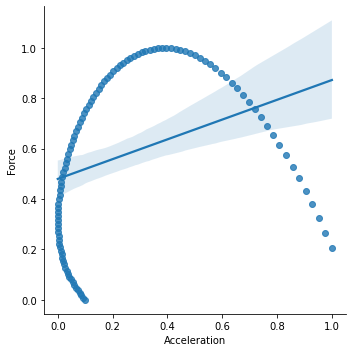

In [25]:
sns.lmplot(x="Acceleration", y="Force", data=df, )#fit_reg=False)

In [26]:
a=np.array(df['Acceleration'])
b=np.array(df['Velocity'])
c=np.array(df['Position'])
F=np.array(df['Force'])

In [27]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(a, F, 3))

print(r2_score(F, mymodel(a)))

0.6997611806483354
